# Доступ к нейронам

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
 mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

X_train,X_test = X_train/255.0,X_test/255.0

print(X_train.shape)


(60000, 28, 28)


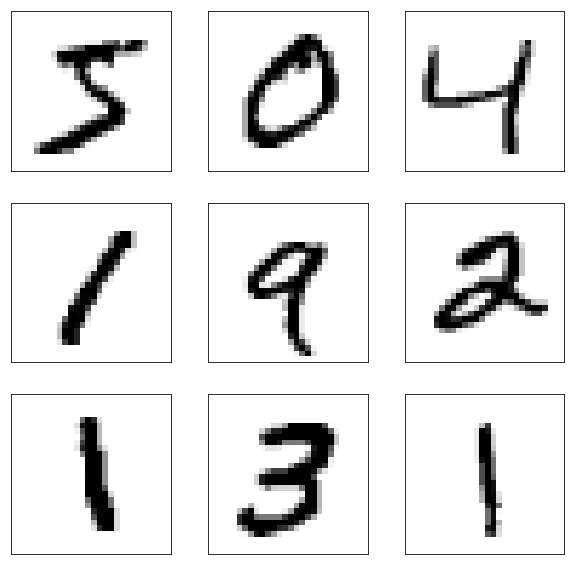

In [3]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
  


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256),
    tf.keras.layers.ReLU(input_shape=(None,256)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.ReLU(input_shape=(None,128)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


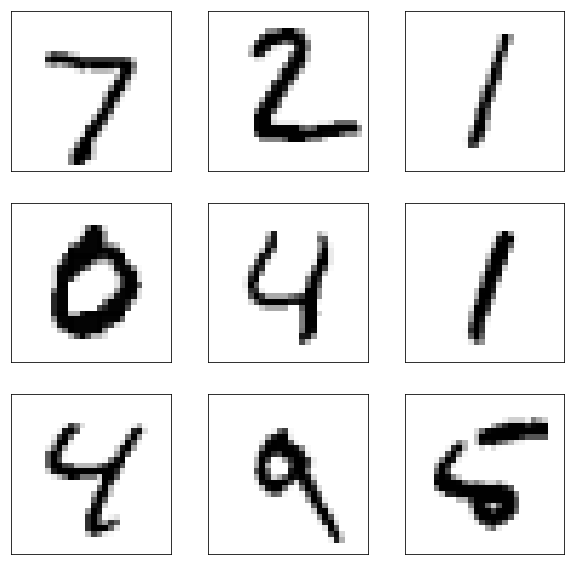

In [5]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)

In [6]:
model.fit(X_train, y_train, epochs=7)


Epoch 1/7
60000/60000 [==============================] - 5s 78us/step - loss: 0.2037 - acc: 0.9403
Epoch 2/7
60000/60000 [==============================] - 4s 73us/step - loss: 0.0850 - acc: 0.9734
Epoch 3/7
60000/60000 [==============================] - 4s 73us/step - loss: 0.0566 - acc: 0.9818
Epoch 4/7
60000/60000 [==============================] - 4s 73us/step - loss: 0.0435 - acc: 0.9858
Epoch 5/7
60000/60000 [==============================] - 4s 73us/step - loss: 0.0342 - acc: 0.9886
Epoch 6/7
60000/60000 [==============================] - 4s 75us/step - loss: 0.0277 - acc: 0.9905
Epoch 7/7
60000/60000 [==============================] - 4s 74us/step - loss: 0.0233 - acc: 0.9920


In [7]:
predictions = model.predict(X_test)

p0 = np.argmax(predictions[0])

print(p0)

7


In [8]:
get_1_layer_output = tf.keras.backend.function([model.layers[0].input],[model.layers[1].output])
get_2_layer_output = tf.keras.backend.function([model.layers[0].input],[model.layers[2].output])
get_3_layer_output = tf.keras.backend.function([model.layers[0].input],[model.layers[3].output])
get_4_layer_output = tf.keras.backend.function([model.layers[0].input],[model.layers[4].output])

layer_1 = get_1_layer_output([X_test])[0]
layer_2 = get_2_layer_output([X_test])[0]
layer_3 = get_3_layer_output([X_test])[0]
layer_4 = get_3_layer_output([X_test])[0]

print(layer_1.shape)
print(layer_2.shape)
print(layer_3.shape)
print(layer_4.shape)


(10000, 256)
(10000, 256)
(10000, 128)
(10000, 128)


In [9]:
nth_weights = model.layers[1].get_weights()


In [10]:
model.save("../models/mnist_model.h5",overwrite=True,include_optimizer=True)